<img src=https://www.universidadviu.com/sites/universidadviu.com/themes/custom/universidadviu_com/logo.webp style="height: 100px">
<center style="color:#888">Master en Bigdata y  Data Science<br/>Trabajo Final de Master 2022</center>

## **Identificación de oportunidades de compra en el mercado inmobiliario para alquiler**

**Autor:** Luis Eduardo Rodriguez<br/>
**Módulo:** Preprocesado/Exploración de datos

### **Carga de datos:**

*   Se guardan los datos en la carpeta ./data en el mismo directorio que este libro
*   Los datos de entradas son ficheros csv  con la informacion recolectada mediante req idealista. 

In [1]:
#Working Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

In [2]:
#Lectura CSVs  desde directorio data desde donde esta guardado el libro, todos tiene las mismas columnas
df = pd.DataFrame()
for csv_file in Path('.').glob('data/*.csv'):
    df_aux = pd.read_csv(csv_file, index_col=None, header=0)
    df = df.append(df_aux, ignore_index=True, sort=False)


### **Exploracion inicial:**

*   Campo con muchos nulos: newDevelopmentfinished  
*   Campos vacios (a revisar): floor,distric,neighborhood,status, haslift, parkinspace,labels
*   Campos numéricos como objet: floor. 
*   Campos potencialmente inecesarios: unamed: 0, thumbnail, numPhotos, country, hasVideo, detailedType, SuggestedText,hasPlan, has3Dtour, has360, hasStaging, topNewDevelopmen,
*   Variables categoricas: propertyType, Operation, country, province, municipality, district, neighborhood, detailedType

In [3]:
print(df.info())
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9391 non-null   int64  
 1   propertyCode            9391 non-null   int64  
 2   thumbnail               9328 non-null   object 
 3   externalReference       7401 non-null   object 
 4   numPhotos               9391 non-null   int64  
 5   floor                   8427 non-null   object 
 6   price                   9391 non-null   float64
 7   propertyType            9391 non-null   object 
 8   operation               9391 non-null   object 
 9   size                    9391 non-null   float64
 10  exterior                9391 non-null   bool   
 11  rooms                   9391 non-null   int64  
 12  bathrooms               9391 non-null   int64  
 13  address                 9391 non-null   object 
 14  province                9391 non-null   

In [4]:
pd.set_option('max_columns', None)
df.head(5)

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,district,country,neighborhood,latitude,longitude,showAddress,url,distance,description,hasVideo,status,newDevelopment,hasLift,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,parkingSpace,labels,newDevelopmentFinished
0,0,97064171,https://img3.idealista.com/blur/WEB_LISTING/0/...,JO-ARNICHES800,36,5,800.0,flat,rent,45.0,True,1,1,Calle de Carlos Arniches,Madrid,Madrid,Centro,es,Lavapiés-Embajadores,40.406651,-3.710015,False,https://www.idealista.com/inmueble/97064171/,1267,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,True,good,False,True,18.0,{'typology': 'flat'},"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",False,False,False,False,False,NaN,NaN,NaN
1,1,97065270,https://img3.idealista.com/blur/WEB_LISTING/0/...,GN-CVTS3000,62,1,3200.0,flat,rent,210.0,True,3,3,"Calle Cervantes, 22",Madrid,Madrid,Centro,es,Huertas-Cortes,40.414198,-3.697331,True,https://www.idealista.com/inmueble/97065270/,601,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,True,good,False,True,15.0,{'typology': 'flat'},"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",False,False,False,False,False,NaN,NaN,NaN
2,2,97115209,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,28,2,1500.0,flat,rent,97.0,False,2,2,Calle de Fernández de la Hoz,Madrid,Madrid,Chamberí,es,Nuevos Ministerios-Ríos Rosas,40.438127,-3.693074,False,https://www.idealista.com/inmueble/97115209/,2518,Piso en emblemática finca en la calle Fernande...,False,good,False,True,15.0,{'typology': 'flat'},"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...",False,False,False,False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
3,3,97104257,https://img3.idealista.com/blur/WEB_LISTING/0/...,2701-AM,22,5,3100.0,duplex,rent,220.0,True,2,3,Calle de Valverde,Madrid,Madrid,Centro,es,Malasaña-Universidad,40.424661,-3.701559,False,https://www.idealista.com/inmueble/97104257/,876,Diplomatic Real Estate ofrece ático dúplex úni...,False,good,False,True,14.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,False,False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
4,4,97115208,https://img3.idealista.com/blur/WEB_LISTING/0/...,GN-ATOCHA2100,52,3,2100.0,flat,rent,169.0,True,3,2,Calle de Atocha,Madrid,Madrid,Centro,es,Huertas-Cortes,40.412576,-3.698022,False,https://www.idealista.com/inmueble/97115208/,667,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,True,good,False,True,12.0,{'typology': 'flat'},"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",False,False,False,False,False,NaN,NaN,NaN


In [5]:
#view columns
df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'neighborhood', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'topNewDevelopment', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

### **Eliminación de etiquetas:**

Se ha revisado las etiquestas teniendo en cuenta su significado, valor,distribucion y utilidad  para el objetivo. A continuacion una breve descripcion por que se eliminan sin analisis detallado:

* **Unamed: 0:** es el índice del DataFrame (DF) durante la extracción, no tiene ningún valor.
* **thumbnail:** Url fotos descriptivas sin valor para caracterizar la propiedad
* **externalReference:** Acrónimo de la agencia inmobiliaria que lo publicita el aviso.
* **numPhotos:** número de fotos cargadas en cada propiedad
* **country:** ya que el contexto del trabajo se sabe, no es necesario saber el país
* **hasVideo, hasPlan, has3DTour, has360, hasStaging:** son indicadores de información que contiene cada aviso.
* **newDevelopment:** Ya está contenido en el status, por lo cual es redundante.
* **SuggestedText:** Un diccionario de lo que debe contener el aviso sin utilidad para caracterizar la propiedad.
* **topNewDevelopmen:** Todas las muestras son "False"
* **newDevelopmentfinished:** Aunque puede ser útil no hay suficientes datos para ambas operaciones por lo cual se descarta
* **labels:** Etiqueta de idealista para identificar propiedades de lujo, villas etc. El problema es que no está clara la categorización tampoco hay datos suficientes, por lo que es conveniente descartarla.
* **showAddress:** Indica si el anuncio muestra la dirección.
* **priceByArea:** esta variable se explica por la relación price/size, pero como queremos predecir el precio, por lo que se mantiene estas dos.


In [6]:
#Visualizacion de columnas agrupadas operation,status,newDevelopment

df.groupby(["operation","status","newDevelopment"]).size()

operation  status          newDevelopment
rent       good            False             4413
           newdevelopment  True                11
           renew           False               17
sale       good            False             4083
           newdevelopment  True               172
           renew           False              690
dtype: int64

In [7]:
#Visualizacion de columnas agrupadas operation,topNewDevelopment

df.groupby(["operation","topNewDevelopment"]).size()

operation  topNewDevelopment
rent       False                4441
sale       False                4950
dtype: int64

In [8]:
#Visualizacion de columnas agrupadas operation,newDevelopmentFinished

df.groupby(["operation","newDevelopmentFinished"]).size()

operation  newDevelopmentFinished
rent       False                       3
           True                        8
sale       False                     150
           True                       27
dtype: int64

In [9]:
#Visualizacion de columnas agrupadas operation, lables
df.groupby(["operation","labels"]).size()

operation  labels                                                                                      
rent       [{'name': 'apartamentoType', 'text': 'Apartamento'}, {'name': 'luxuryType', 'text': 'Lujo'}]      5
           [{'name': 'apartamentoType', 'text': 'Apartamento'}]                                            188
           [{'name': 'loftType', 'text': 'Loft'}]                                                            5
           [{'name': 'luxuryType', 'text': 'Lujo'}]                                                         84
           [{'name': 'villaType', 'text': 'Villa'}, {'name': 'luxuryType', 'text': 'Lujo'}]                  8
           [{'name': 'villaType', 'text': 'Villa'}]                                                          6
sale       [{'name': 'apartamentoType', 'text': 'Apartamento'}, {'name': 'luxuryType', 'text': 'Lujo'}]     17
           [{'name': 'apartamentoType', 'text': 'Apartamento'}]                                             44
        

In [10]:
#se revisa "hasStaging" tomando la url  y verificando  que es una simulacion de ambiente, sin utilidad para el modelado
df[df["hasStaging"] ==True].head(2)

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,district,country,neighborhood,latitude,longitude,showAddress,url,distance,description,hasVideo,status,newDevelopment,hasLift,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,parkingSpace,labels,newDevelopmentFinished
4554,113,96889578,https://img3.idealista.com/blur/WEB_LISTING/0/...,13856,43,NaN,1280000.0,chalet,sale,404.0,False,4,4,Calle Antonio Cavero,Madrid,Madrid,Ciudad Lineal,es,Colina,40.459696,-3.658670,False,https://www.idealista.com/inmueble/96889578/,6083,Suma inmobiliaria le ofrece este magnífico cha...,True,good,False,NaN,3168.0,"{'typology': 'chalet', 'subTypology': 'semidet...","{'subtitle': 'Colina, Madrid', 'title': 'Chale...",True,True,False,True,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'luxuryType', 'text': 'Lujo'}]",NaN
4576,135,96890827,https://img3.idealista.com/blur/WEB_LISTING/0/...,NM170826,48,NaN,1150000.0,chalet,sale,577.0,False,7,6,VALLE DEL BELAGUA,Madrid,Boadilla del Monte,Las Lomas,es,NaN,40.434874,-3.890241,False,https://www.idealista.com/inmueble/96890827/,15934,Gilmar Boadilla vende en exclusiva chalet inde...,True,renew,False,NaN,1993.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Las Lomas, Boadilla del Monte', ...",True,True,False,True,False,NaN,NaN,NaN


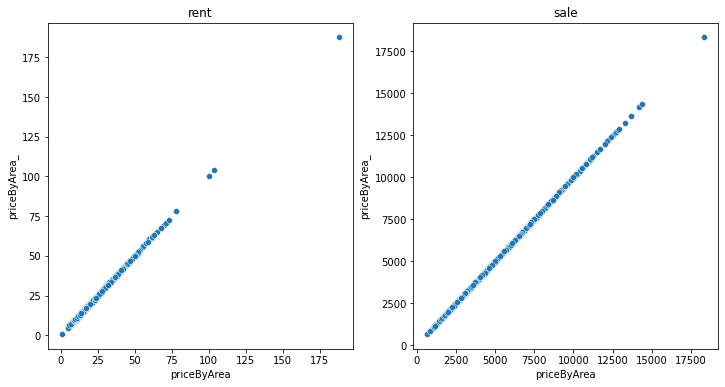

In [11]:
# La variable  priceByArea  es basicamente la relacion entre price/size  por lo que se puede eliminar
df1 = df.copy()
df1['priceByArea_'] = (df1['price'] / df1['size'])
#df1['priceByArea_'] = df1['price']

colors=('red', 'blue')
#colors = list('rgbkymc')
mark = ['.','.'] 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=df1[df1["operation"] == "rent"],x='priceByArea',y='priceByArea_', palette=colors, markers = mark, ax=axs[0]).set_title('rent')
sns.scatterplot(data=df1[df1["operation"] == "sale"],x='priceByArea',y='priceByArea_', palette=colors, markers = mark, ax=axs[1]).set_title('sale')
plt.show()
#df1.head()

#df1.head()

In [12]:
#dropping useless features
dropcolumns = ['Unnamed: 0', 'thumbnail', 'externalReference', 'numPhotos', 'country',
               'hasVideo', 'newDevelopment','suggestedTexts', 'hasPlan', 'has3DTour',
               'has360', 'hasStaging', 'topNewDevelopment', 'labels', 'newDevelopmentFinished',
              'showAddress', 'priceByArea']

df = df.drop(columns=dropcolumns)

In [13]:
df.shape

(9391, 23)

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   propertyCode  9391 non-null   int64  
 1   floor         8427 non-null   object 
 2   price         9391 non-null   float64
 3   propertyType  9391 non-null   object 
 4   operation     9391 non-null   object 
 5   size          9391 non-null   float64
 6   exterior      9391 non-null   bool   
 7   rooms         9391 non-null   int64  
 8   bathrooms     9391 non-null   int64  
 9   address       9391 non-null   object 
 10  province      9391 non-null   object 
 11  municipality  9391 non-null   object 
 12  district      9203 non-null   object 
 13  neighborhood  7835 non-null   object 
 14  latitude      9391 non-null   float64
 15  longitude     9391 non-null   float64
 16  url           9391 non-null   object 
 17  distance      9391 non-null   int64  
 18  description   9353 non-null 

### **Identificando duplicados**
Confirmamos que el dset no tiene duplicados:

In [15]:
print("properties duplicadas (rows,col) :",df[df["propertyCode"].duplicated()].shape)
print("url duplicadas (rows,col) :",df[df["url"].duplicated()].shape)
#df = df.drop_duplicates(subset="url", keep='first')  #eliminar duplicados

properties duplicadas (rows,col) : (0, 23)
url duplicadas (rows,col) : (0, 23)


### **Tratamiento de Campos Vacios**

* Se revisa y reemplaza campos para floor,haslift, parkingSpace, status, district y neigborhood
* No se realiza cambios en description ya que no son variables de interes

AxesSubplot(0.125,0.125;0.698618x0.755)


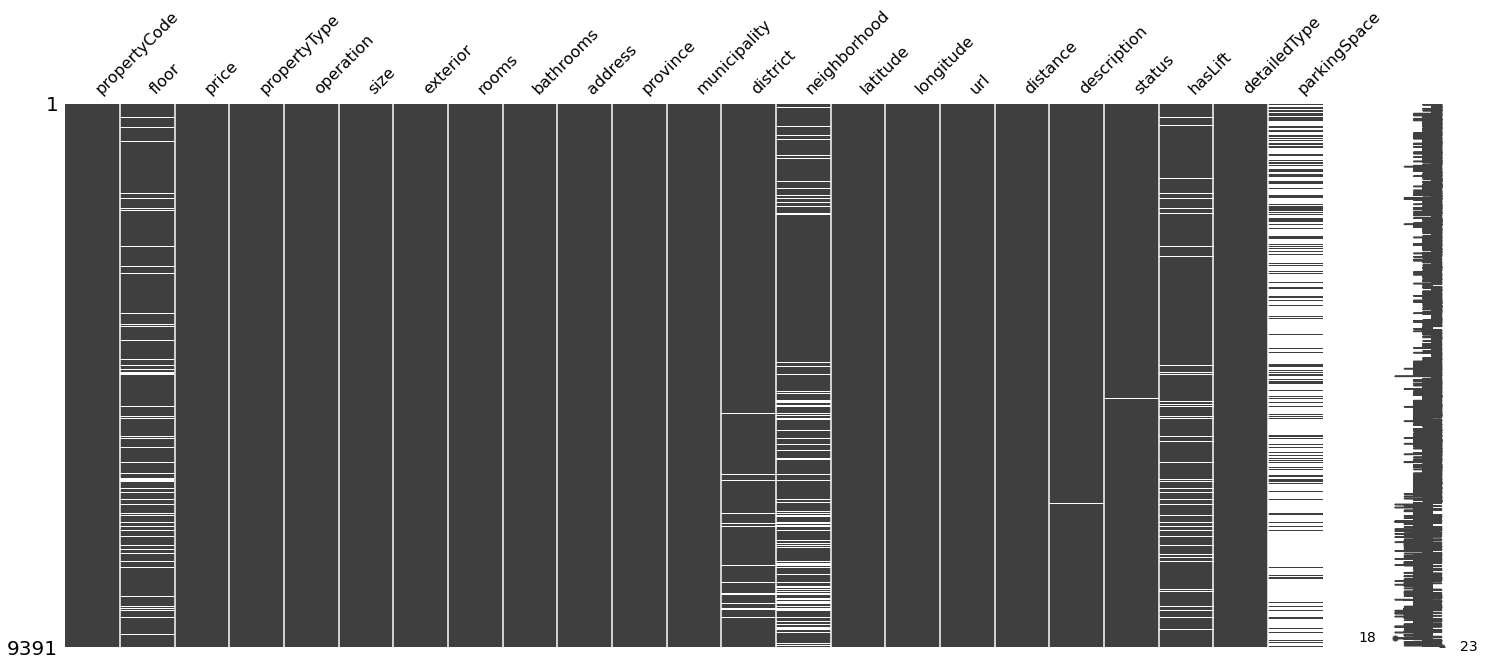

In [16]:
#Data set antes de tratamiento de campos vacios
import missingno as msno
print(msno.matrix(df))

In [17]:
df[df["floor"].isnull()].head()
#df[df["floor"] == "en"].head() 

,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,district,neighborhood,latitude,longitude,url,distance,description,status,hasLift,detailedType,parkingSpace
28,96881652,NaN,1200.0,flat,rent,76.0,True,2,2,barrio Quintana,Madrid,Madrid,Ciudad Lineal,Quintana,40.440303,-3.636425,https://www.idealista.com/inmueble/96881652/,6242,Piso amueblado en Arturo Soria en alquiler Eng...,good,True,{'typology': 'flat'},"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
61,96884843,NaN,2500.0,studio,rent,105.0,True,0,3,barrio Las Tablas,Madrid,Madrid,Fuencarral,Las Tablas,40.498502,-3.675852,https://www.idealista.com/inmueble/96884843/,9368,Local en Las Tablas con salida de humos y ampl...,renew,False,"{'typology': 'flat', 'subTypology': 'studio'}","{'hasParkingSpace': True, 'isParkingSpaceInclu..."
62,96884845,NaN,2000.0,studio,rent,97.0,True,0,3,barrio Las Tablas,Madrid,Madrid,Fuencarral,Las Tablas,40.500802,-3.673452,https://www.idealista.com/inmueble/96884845/,9667,Local en Las Tablas con salida de humos y ampl...,good,False,"{'typology': 'flat', 'subTypology': 'studio'}","{'hasParkingSpace': True, 'isParkingSpaceInclu..."
63,96884848,NaN,3000.0,studio,rent,132.0,True,0,1,barrio Las Tablas,Madrid,Madrid,Fuencarral,Las Tablas,40.500301,-3.675753,https://www.idealista.com/inmueble/96884848/,9564,Local en Las Tablas apto para hosterleria con ...,good,False,"{'typology': 'flat', 'subTypology': 'studio'}","{'hasParkingSpace': True, 'isParkingSpaceInclu..."
82,96888458,NaN,1650.0,penthouse,rent,87.0,True,2,1,barrio Zona Avenida Europa,Madrid,Pozuelo de Alarcón,Zona Avenida Europa,Zona Avenida Europa,40.437776,-3.796270,https://www.idealista.com/inmueble/96888458/,8189,Ático dúplex con amplia terraza Engel & Völker...,good,True,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [18]:
# no hay relación  de nulos con el tipo de propiedad  asumimos que el anunciante no quiso indicar el dato
df[df["floor"].isnull()].groupby(["propertyType","detailedType"]).size()

propertyType  detailedType                                               
chalet        {'typology': 'chalet', 'subTypology': 'independantHouse'}      194
              {'typology': 'chalet', 'subTypology': 'semidetachedHouse'}      88
              {'typology': 'chalet', 'subTypology': 'terracedHouse'}         173
              {'typology': 'chalet'}                                          46
countryHouse  {'typology': 'countryHouse', 'subTypology': 'casale'}            2
              {'typology': 'countryHouse', 'subTypology': 'countryHouse'}      2
              {'typology': 'countryHouse'}                                     1
duplex        {'typology': 'flat', 'subTypology': 'duplex'}                   11
flat          {'typology': 'flat'}                                           422
penthouse     {'typology': 'flat', 'subTypology': 'penthouse'}                19
studio        {'typology': 'flat', 'subTypology': 'studio'}                    6
dtype: int64

In [19]:
# Valores para floor antes de la limpieza
print("Total rows null:",df[df["floor"].isnull()].shape[0])
print("Floors  Counts")
print(df['floor'].value_counts())

Total rows null: 964
Floors  Counts
1     1838
2     1609
3     1299
4     1111
bj     898
5      596
6      331
7      214
en     199
8      124
9       59
10      28
11      22
ss      15
st      15
13      13
12      13
14      10
16       6
20       5
-1       5
15       4
19       3
18       3
22       2
17       2
27       1
21       1
30       1
Name: floor, dtype: int64


In [20]:
#Convertimos pisos a números enteros y redondeamos a 1 decimal
df['floor'] = df['floor'].replace({'en': 0.5, 'bj': 0, 'ss': -0.5, 'st': -1}).astype(float)
df['floor'] = df['floor'].fillna(df['floor'].mean())
df['floor'] = df['floor'].round(decimals = 1)

In [21]:
# Valores para floor despues de la limpieza
print("Total rows null:",df[df["floor"].isnull()].shape[0])
print("Floors  Counts")
print(df['floor'].value_counts())

Total rows null: 0
Floors  Counts
 1.0     1838
 2.0     1609
 3.0     1299
 4.0     1111
 2.7      964
 0.0      898
 5.0      596
 6.0      331
 7.0      214
 0.5      199
 8.0      124
 9.0       59
 10.0      28
 11.0      22
-1.0       20
-0.5       15
 13.0      13
 12.0      13
 14.0      10
 16.0       6
 20.0       5
 15.0       4
 19.0       3
 18.0       3
 22.0       2
 17.0       2
 27.0       1
 21.0       1
 30.0       1
Name: floor, dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   propertyCode  9391 non-null   int64  
 1   floor         9391 non-null   float64
 2   price         9391 non-null   float64
 3   propertyType  9391 non-null   object 
 4   operation     9391 non-null   object 
 5   size          9391 non-null   float64
 6   exterior      9391 non-null   bool   
 7   rooms         9391 non-null   int64  
 8   bathrooms     9391 non-null   int64  
 9   address       9391 non-null   object 
 10  province      9391 non-null   object 
 11  municipality  9391 non-null   object 
 12  district      9203 non-null   object 
 13  neighborhood  7835 non-null   object 
 14  latitude      9391 non-null   float64
 15  longitude     9391 non-null   float64
 16  url           9391 non-null   object 
 17  distance      9391 non-null   int64  
 18  description   9353 non-null 

In [23]:
#Ascensor antes 
print(df['hasLift'].value_counts())

True     6590
False    2094
Name: hasLift, dtype: int64


In [24]:
#convertimos todos estos campos a ENTEROS y rellenamos con False los nulos.
df['hasLift'] = df['hasLift'].fillna(False)

In [25]:
#Ascensor despues
print(df['hasLift'].value_counts())

True     6590
False    2801
Name: hasLift, dtype: int64


In [26]:
#print(df['parkingSpace'].notnull())
print(df['parkingSpace'].value_counts())

{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}                                    2095
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 100.0}         47
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 120.0}         36
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 150.0}         27
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 20000.0}       10
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}        9
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 180.0}          8
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 200.0}          8
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 30000.0}        8
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPric

In [27]:
#remplazamos Nulos por "{'hasParkingSpace': False, 'isParkingSpaceIncludedInPrice': False}"
df['parkingSpace'] = df['parkingSpace'].fillna("{'hasParkingSpace': False, 'isParkingSpaceIncludedInPrice': False}")
print(df['parkingSpace'].value_counts())

{'hasParkingSpace': False, 'isParkingSpaceIncludedInPrice': False}                                  7037
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}                                    2095
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 100.0}         47
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 120.0}         36
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 150.0}         27
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 20000.0}       10
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}        9
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 180.0}          8
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 30000.0}        8
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPric

In [28]:
#Convertimos  Parking Space en: hasParkingSpace, isParkingSpaceIncludedInPrice, luego lo removemos
df_aux = df['parkingSpace'].str.split(n=4, expand=True)
df_aux.columns =['h1', 'hasParkingSpace', 'h2', 'isParkingSpaceIncludedInPrice', 'h3']
df_aux['hasParkingSpace'] = df_aux['hasParkingSpace'].replace({'False,': 'False', 'True,': 'True'})
df_aux['isParkingSpaceIncludedInPrice'] = df_aux['isParkingSpaceIncludedInPrice'].replace({'False}': 'False', 'False,': 'False', 'True}': 'True'})
df = pd.concat([df,df_aux[['hasParkingSpace', 'isParkingSpaceIncludedInPrice']]], axis=1).drop(['parkingSpace','isParkingSpaceIncludedInPrice'], axis=1)
df.shape


(9391, 23)

In [29]:
df.groupby(["status"]).size()

status
good              8496
newdevelopment     183
renew              707
dtype: int64

In [30]:
# Sustituimos NAN en status por "good"
df['status'] = df['status'].fillna("good")

In [31]:
# Sustituimos NAN en distrito por municipalidades. y en vecindario por distrito
df['district'] = df['district'].fillna(df['municipality'])
df['neighborhood'] = df['neighborhood'].fillna(df['district'])

In [32]:
# Revisamos propertyType contra detailedType,
df.groupby(["propertyType","detailedType"]).size()


propertyType  detailedType                                               
chalet        {'typology': 'chalet', 'subTypology': 'independantHouse'}       194
              {'typology': 'chalet', 'subTypology': 'semidetachedHouse'}       94
              {'typology': 'chalet', 'subTypology': 'terracedHouse'}          188
              {'typology': 'chalet'}                                           68
countryHouse  {'typology': 'countryHouse', 'subTypology': 'casaTerrera'}        1
              {'typology': 'countryHouse', 'subTypology': 'casale'}             2
              {'typology': 'countryHouse', 'subTypology': 'countryHouse'}       2
              {'typology': 'countryHouse'}                                      1
duplex        {'typology': 'flat', 'subTypology': 'duplex'}                   279
flat          {'typology': 'flat'}                                           7839
penthouse     {'typology': 'flat', 'subTypology': 'penthouse'}                448
studio        {'typology

In [33]:
#Convertimos  detailType en los subgrupos Typology y Subtypology, remplazamos nan  de SubTypology por Typology
df_aux = df['detailedType'].str.split(n=3, expand=True)
df_aux.columns =['h1', 'typology', 'h2', 'subTypology']
df_aux['typology'] = df_aux['typology'].replace({"'chalet',": 'chalet', "'chalet'}": 'chalet',
                                                 "'flat',": 'flat', "'flat'}": 'flat',
                                                 "'countryHouse',": 'countryHouse', "'countryHouse'}": 'countryHouse'})
df_aux['subTypology'] = df_aux['subTypology'].replace({"'casaTerrera'}": 'casaTerrera', "'casale'}": 'casale',
                                                       "'countryHouse'}": 'countryHouse', "'duplex'}": 'duplex',
                                                       "'independantHouse'}": 'independantHouse', "'studio'}": 'studio',
                                                      "'terracedHouse'}": 'terracedHouse', "'penthouse'}": 'penthouse',
                                                      "'semidetachedHouse'}": 'semidetachedHouse'})
df_aux['subTypology'] = df_aux['subTypology'].fillna(df_aux['typology'])


df = pd.concat([df,df_aux[['typology', 'subTypology']]], axis=1).drop(['detailedType','typology'], axis=1)
df.shape


(9391, 23)

AxesSubplot(0.125,0.125;0.698618x0.755)


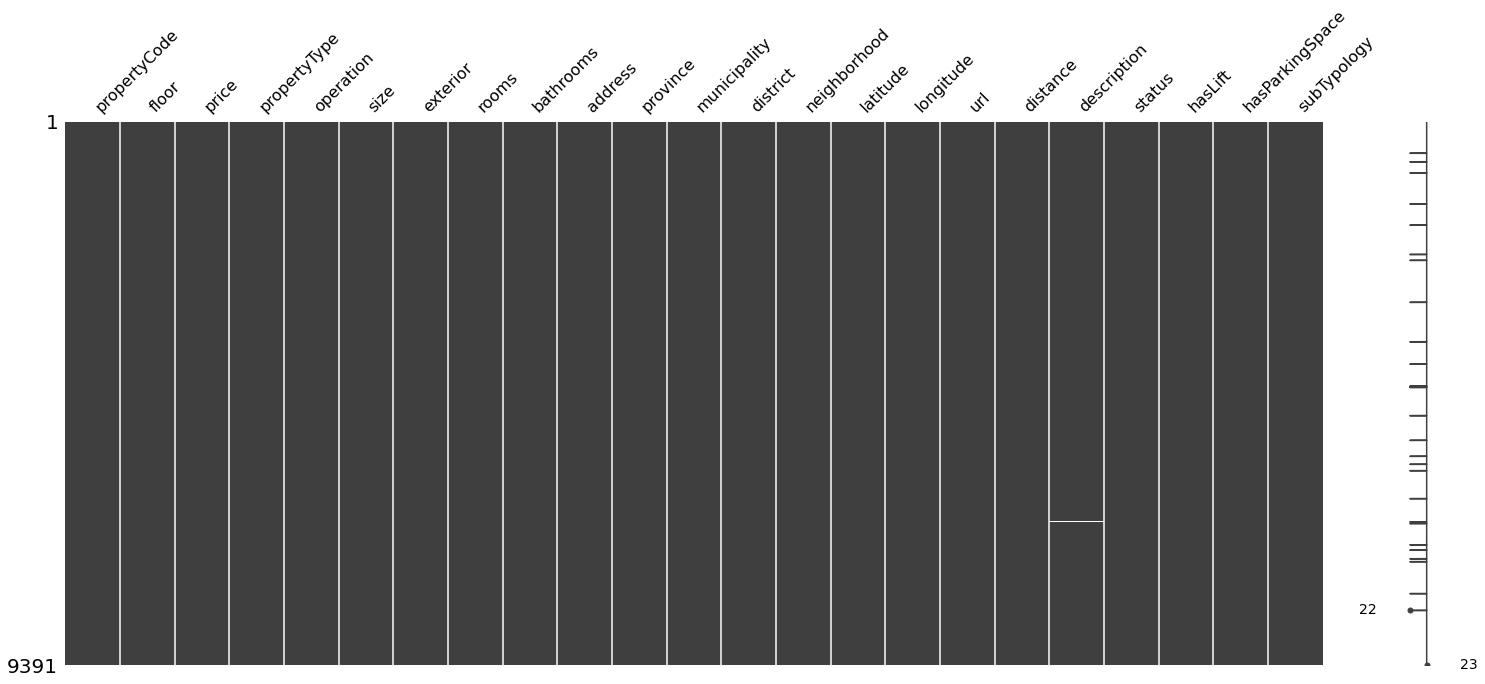

In [34]:
#revision final de dataset despues del feature engineering 
print(msno.matrix(df))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyCode     9391 non-null   int64  
 1   floor            9391 non-null   float64
 2   price            9391 non-null   float64
 3   propertyType     9391 non-null   object 
 4   operation        9391 non-null   object 
 5   size             9391 non-null   float64
 6   exterior         9391 non-null   bool   
 7   rooms            9391 non-null   int64  
 8   bathrooms        9391 non-null   int64  
 9   address          9391 non-null   object 
 10  province         9391 non-null   object 
 11  municipality     9391 non-null   object 
 12  district         9391 non-null   object 
 13  neighborhood     9391 non-null   object 
 14  latitude         9391 non-null   float64
 15  longitude        9391 non-null   float64
 16  url              9391 non-null   object 
 17  distance      

In [36]:
#Transformamos en variables numéricas  todas  las tipo binario (True or False)

columns = df.loc[: , (df == 'False').any()].columns
for column in columns:
    print('string to bolean: ',column)
    df[column] = df[column].map({'True': True, 'False': False})
columns = df.select_dtypes('bool').columns
for column in columns:
    print('bolean to Float',column)
    df[column] = df[column].astype(float)

df.info()


string to bolean:  hasParkingSpace
bolean to Float exterior
bolean to Float hasLift
bolean to Float hasParkingSpace
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyCode     9391 non-null   int64  
 1   floor            9391 non-null   float64
 2   price            9391 non-null   float64
 3   propertyType     9391 non-null   object 
 4   operation        9391 non-null   object 
 5   size             9391 non-null   float64
 6   exterior         9391 non-null   float64
 7   rooms            9391 non-null   int64  
 8   bathrooms        9391 non-null   int64  
 9   address          9391 non-null   object 
 10  province         9391 non-null   object 
 11  municipality     9391 non-null   object 
 12  district         9391 non-null   object 
 13  neighborhood     9391 non-null   object 
 14  latitude         9391 non-null   flo

### **Exploracion de datos**

En esta sección se realiza varios analisis aqui el resumen de los visto:
* **Distribución y balance:** Se observa que las operaciones por ciudad estan desbalanceadas para barcelona,  debido a que en la ingesta de alquileres se hizo con radio 5 km, y para ventas de 20 km,  esto puede trae problemas durante el entrenamiento del modelo, ya que es requisito que existan datos en el mismo cluster para ambas operaciones. Como solucion se va a filtrar los datos de barcelona para distancia <5 aunque se redusca el numero de operaciones de ventas.

* **Correlacion de variables:** Se observa correlación del precio de alquiler y venta con las variables tipo (room, size, bathroom,hastlift). tambien es interesante que la revisar por ciudad  se observa menos,  esto puede que ver la variacion que ha de la distribucion de los datos.

* **Revisión outliers:** Se observan las variables principales con outliers por metodo boxplot y la distancia interquartil, pero no se expcluye hasta el analisis durante el modelado. quedando un total de 7119

In [37]:
df.describe()

,propertyCode,floor,price,size,exterior,rooms,bathrooms,latitude,longitude,distance,hasLift,hasParkingSpace
count,9.391000e+03,9391.000000,9.391000e+03,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000
mean,9.472789e+07,2.722692,2.290977e+05,109.117346,0.762752,2.629645,1.691620,40.887422,-0.939527,5833.848259,0.701736,0.250666
std,1.039445e+07,2.233473,4.440699e+05,101.113498,0.425418,1.338538,0.989666,0.492794,2.919127,5034.959619,0.457520,0.433419
min,5.028270e+05,-1.000000,4.500000e+02,15.000000,0.000000,0.000000,0.000000,40.240085,-3.932230,12.000000,0.000000,0.000000
25%,9.691535e+07,1.000000,1.300000e+03,64.000000,1.000000,2.000000,1.000000,40.426022,-3.695965,2175.000000,0.000000,0.000000
50%,9.696171e+07,2.700000,1.150000e+05,83.000000,1.000000,3.000000,1.000000,40.502508,-3.604387,3939.000000,1.000000,0.000000
75%,9.700611e+07,4.000000,2.850000e+05,120.000000,1.000000,3.000000,2.000000,41.394782,2.154940,7949.500000,1.000000,1.000000
max,9.725819e+07,30.000000,1.100000e+07,2517.000000,1.000000,30.000000,12.000000,41.564783,2.359450,19986.000000,1.000000,1.000000


Text(0.5, 1.0, 'Barcelona')

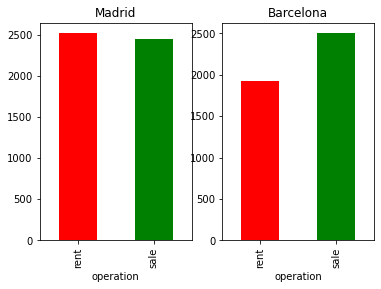

In [38]:
# Samples distribution before
color_list = list('rgbkymc')
plt.subplot(1,2,1)
plt.figure(1,figsize=(10,4))
df[df["province"] == "Madrid"].groupby(["operation"]).size().plot(kind='bar', color=color_list)
plt.title ("Madrid")

plt.subplot(1,2,2)
plt.figure(1,figsize=(10,4))
df[df["province"] == "Barcelona"].groupby(["operation"]).size().plot(kind='bar', color=color_list)
plt.title ("Barcelona")


<Figure size 432x288 with 0 Axes>

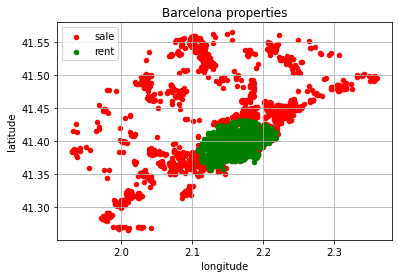

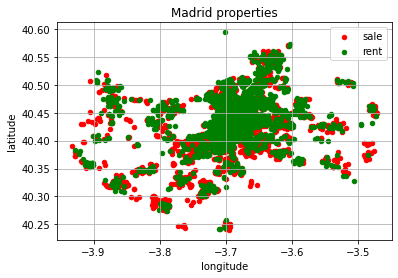

In [39]:
#Geo distribution before
plt.figure(1)
ax = df[(df["operation"]=="sale") & (df["province"]=="Barcelona")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "red",grid = True,label="sale")
df[(df["operation"]=="rent") & (df["province"]=="Barcelona")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "green",grid = True,label="rent", ax=ax)
plt.title ("Barcelona properties")

plt.figure(2)
ax = df[(df["operation"]=="sale") & (df["province"]=="Madrid")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "red",grid = True,label="sale")
df[(df["operation"]=="rent") & (df["province"]=="Madrid")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "green",grid = True,label="rent", ax=ax)
plt.title ("Madrid properties")

plt.show()

In [40]:
#Resumen de muestras y distancias por provincia y operación
print(" ","Distancia Máxima")
print(df.groupby(["province","operation"])['distance'].max())
print("\n","Numero de muestras")
print(df.groupby(["province","operation"]).size())

  Distancia Máxima
province   operation
Barcelona  rent          4996
           sale         19985
Madrid     rent         19964
           sale         19986
Name: distance, dtype: int64

 Numero de muestras
province   operation
Barcelona  rent         1926
           sale         2500
Madrid     rent         2515
           sale         2450
dtype: int64


In [41]:
#Filtrado de Muestras de barcelona  distance < 5000
df = df[((df['province']=="Barcelona") & (df['distance']<5000)) | (df['province']=="Madrid")]

In [42]:
print(" ","Distancia Máxima")
print(df.groupby(["province","operation"])['distance'].max())
print("\n","Numero de muestras")
print(df.groupby(["province","operation"]).size())

  Distancia Máxima
province   operation
Barcelona  rent          4996
           sale          4991
Madrid     rent         19964
           sale         19986
Name: distance, dtype: int64

 Numero de muestras
province   operation
Barcelona  rent         1926
           sale         1161
Madrid     rent         2515
           sale         2450
dtype: int64


Text(0.5, 1.0, 'Barcelona')

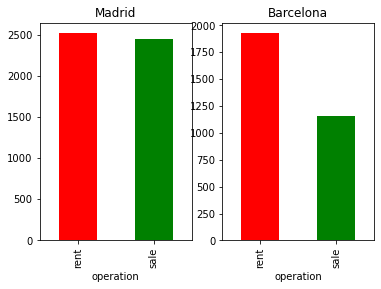

In [43]:
# Samples distribution After

color_list = list('rgbkymc')
plt.subplot(1,2,1)
plt.figure(1,figsize=(10,4))
df[df["province"] == "Madrid"].groupby(["operation"]).size().plot(kind='bar', color=color_list)
plt.title ("Madrid")

plt.subplot(1,2,2)
plt.figure(1,figsize=(10,4))
df[df["province"] == "Barcelona"].groupby(["operation"]).size().plot(kind='bar', color=color_list)
plt.title ("Barcelona")

<Figure size 432x288 with 0 Axes>

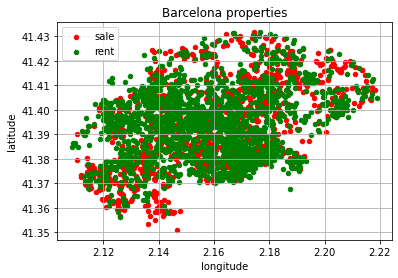

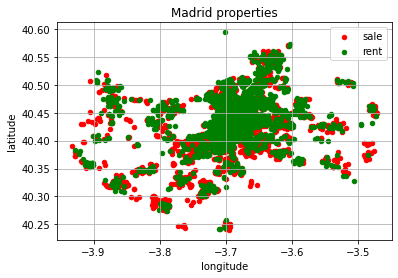

In [44]:
#Geo distribution after
plt.figure(1)
ax = df[(df["operation"]=="sale") & (df["province"]=="Barcelona")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "red",grid = True,label="sale")
df[(df["operation"]=="rent") & (df["province"]=="Barcelona")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "green",grid = True,label="rent", ax=ax)
plt.title ("Barcelona properties")

plt.figure(2)
ax = df[(df["operation"]=="sale") & (df["province"]=="Madrid")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "red",grid = True,label="sale")
df[(df["operation"]=="rent") & (df["province"]=="Madrid")].plot(kind = "scatter", x = 'longitude', y = 'latitude', color = "green",grid = True,label="rent", ax=ax)
plt.title ("Madrid properties")

plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8052 entries, 0 to 9389
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyCode     8052 non-null   int64  
 1   floor            8052 non-null   float64
 2   price            8052 non-null   float64
 3   propertyType     8052 non-null   object 
 4   operation        8052 non-null   object 
 5   size             8052 non-null   float64
 6   exterior         8052 non-null   float64
 7   rooms            8052 non-null   int64  
 8   bathrooms        8052 non-null   int64  
 9   address          8052 non-null   object 
 10  province         8052 non-null   object 
 11  municipality     8052 non-null   object 
 12  district         8052 non-null   object 
 13  neighborhood     8052 non-null   object 
 14  latitude         8052 non-null   float64
 15  longitude        8052 non-null   float64
 16  url              8052 non-null   object 
 17  distance      

PLoteamos 4x4 para ver el nivel de clusterizacion y comparar entre provincia y operación

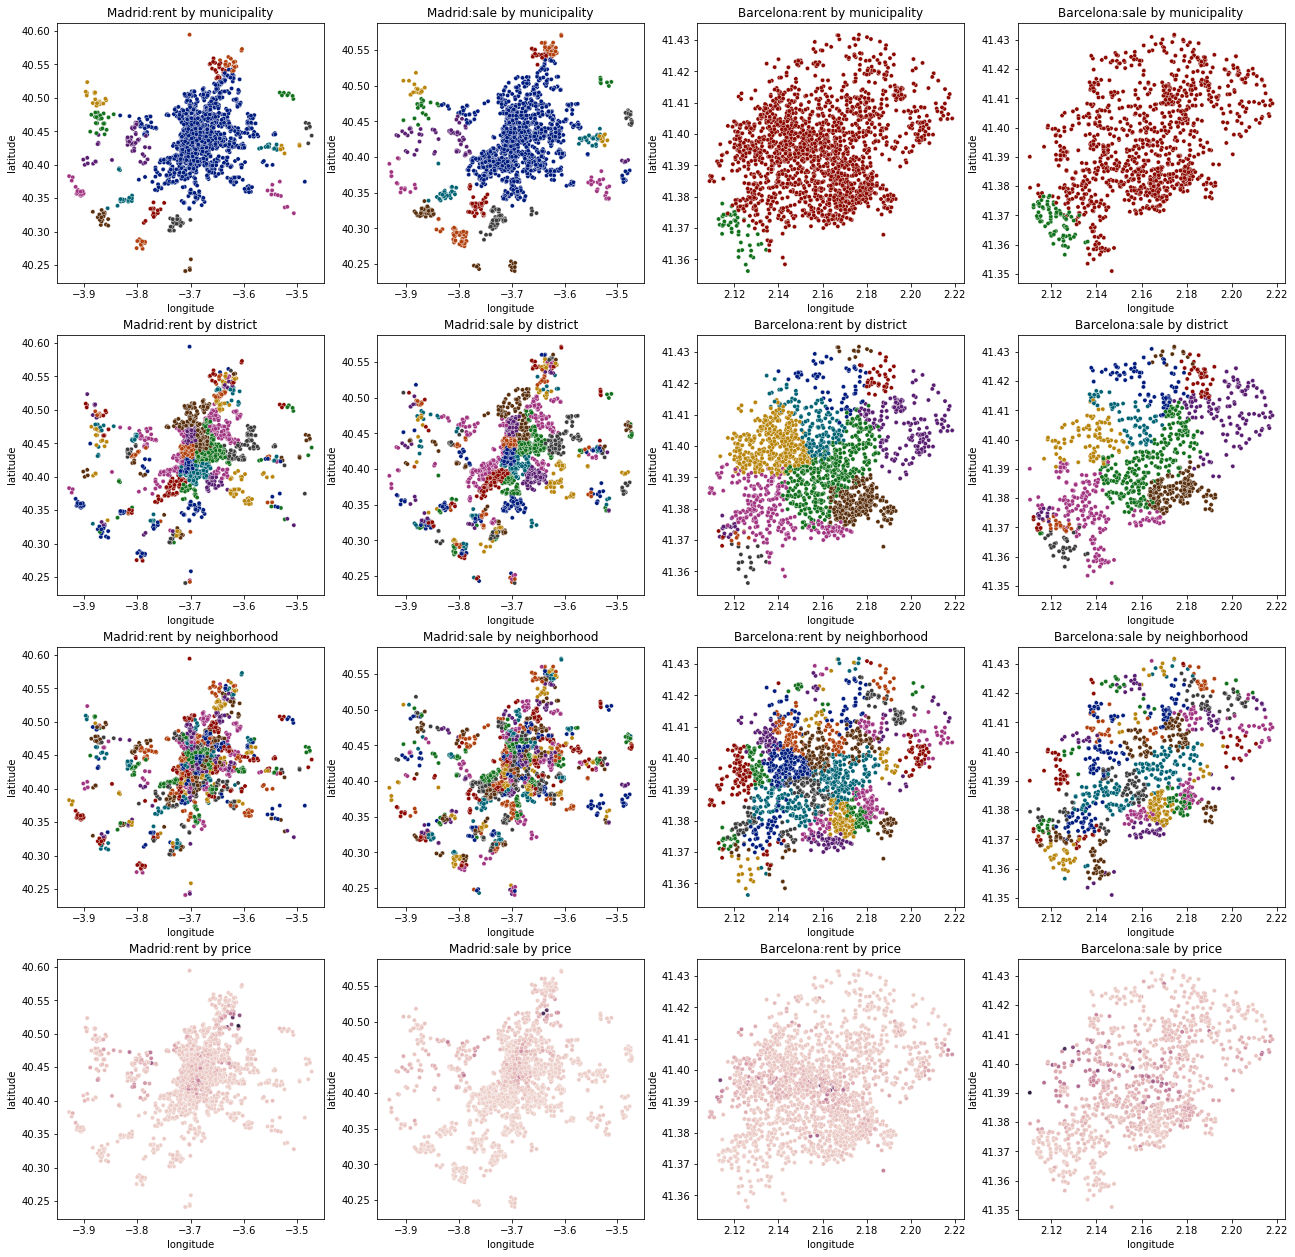

In [46]:
#Define the variables to select each dataset
prov = df["province"].unique()
op = df["operation"].unique()
#define the list of variable for hue (color)
row = ['municipality','district','neighborhood','price']

fig, axs =plt.subplots(len(row),len(prov)+len(op),figsize=(22, 22))
for s in range(len(row)):
    n=0
    #Defining color palette default for float, dictionary for  categorical
    dist=list(df[row[s]].unique())
    if (all(isinstance(x, float) for x in dist)):
        colors = sns.set_palette(sns.color_palette())
    else:
        colors = dict(zip(dist, sns.color_palette("dark",len(dist))))
    
    for p in range(len(prov)):
        for o in range(len(op)):
            #print(s,n)
            sns.scatterplot(data=df[(df["operation"]==op[o]) & (df["province"]==prov[p])], x='longitude', y='latitude',
                            hue=row[s], size=1, legend = False, palette = colors, ax=axs[s, n]).set_title(prov[p]+":"+op[o]+' by '+row[s])

            n =n+1
plt.show()


Se puede ver que la clusterizacion  es buena para ambas ciudad.

Se va a usar la variable price log, ya que la distribucion tiene a ser mas de tipo Normal (descrita por la kurtosiss,  y el skewness)

<Figure size 360x1440 with 0 Axes>

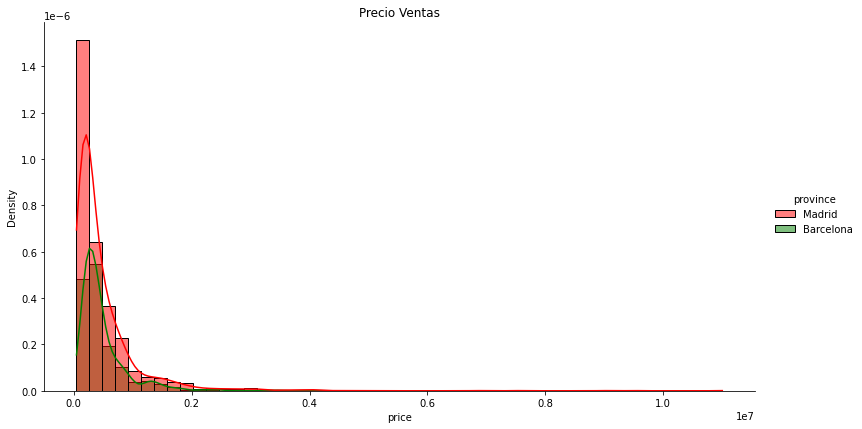

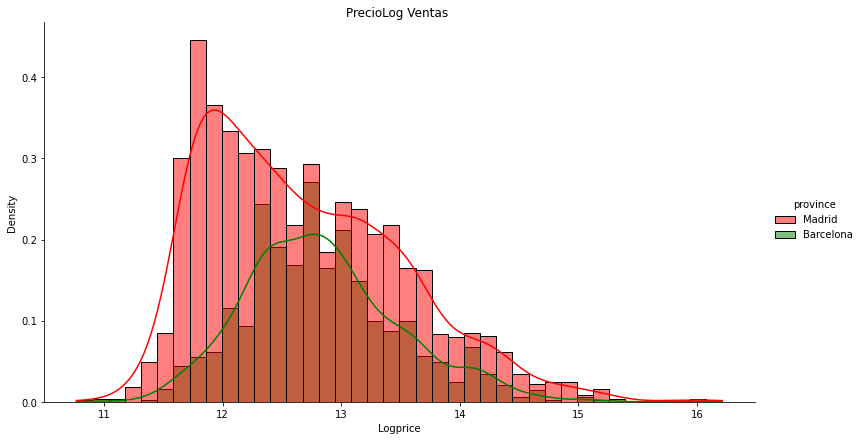

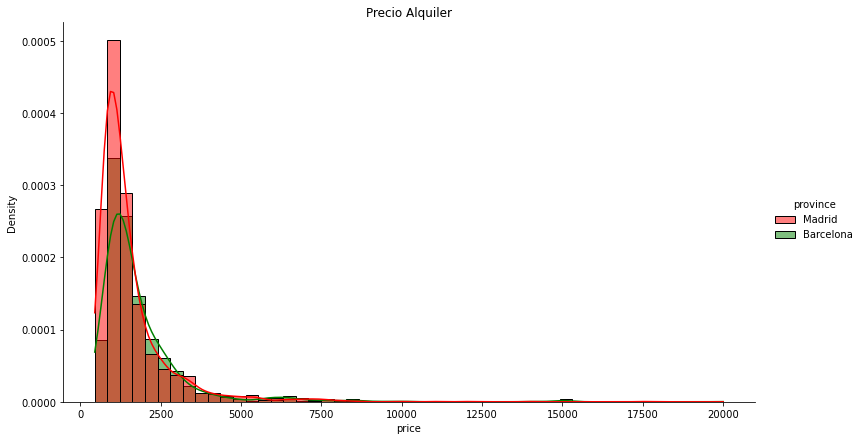

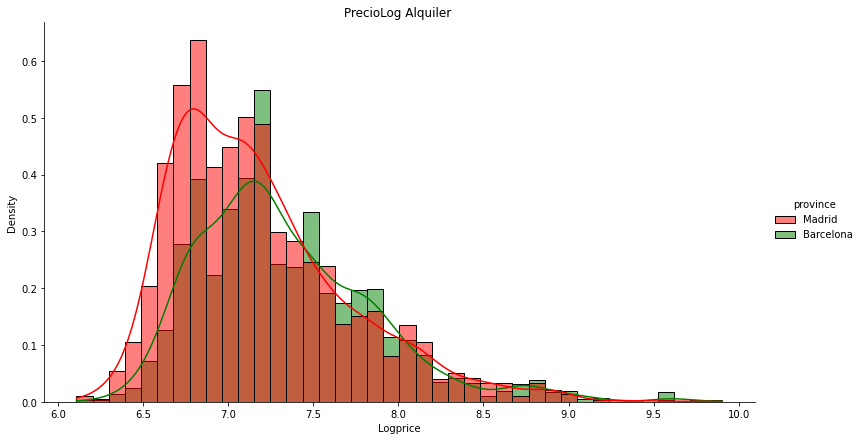

Sale Price Skewness: 6.284549
Sale Price Kurtosis: 73.136262
Sale LogPrice Skewness: 0.617123
Sale LogPrice Kurtosis: 0.153387
Rent Price Skewness: 4.553591
Rent Price Kurtosis: 34.222670
Rent LogPrice Skewness: 1.045773
Rent LogPrice Kurtosis: 1.394287


In [47]:
colors = list('rg')
df1=df[(df["operation"]=="sale")].copy()
df2=df[(df["operation"]=="rent")].copy()

df1['Logprice'] = np.log(df1.price.values)
df2['Logprice'] = np.log(df2.price.values)


plt.figure(figsize=(5,20))
sns.displot(data=df1, x='price', kde=True, palette=colors, hue='province', log_scale=False, height=6, aspect=1.8, bins=50,stat="density").set(title='Precio Ventas')
sns.displot(data=df1, x='Logprice', kde=True, palette=colors, hue='province', height=6, aspect=1.8, bins=40, stat="density").set(title='PrecioLog Ventas ')
sns.displot(data=df2, x='price', kde=True, palette=colors, hue='province', log_scale=False, height=6, aspect=1.8, bins=50,stat="density").set(title='Precio Alquiler')
sns.displot(data=df2, x='Logprice', kde=True, palette=colors, hue='province', height=6, aspect=1.8, bins=40, stat="density").set(title='PrecioLog Alquiler ')

plt.show()
print("Sale Price Skewness: %f" % df1['price'].skew())
print("Sale Price Kurtosis: %f" % df1['price'].kurt())
print("Sale LogPrice Skewness: %f" % df1['Logprice'].skew())
print("Sale LogPrice Kurtosis: %f" % df1['Logprice'].kurt())
print("Rent Price Skewness: %f" % df2['price'].skew())
print("Rent Price Kurtosis: %f" % df2['price'].kurt())
print("Rent LogPrice Skewness: %f" % df2['Logprice'].skew())
print("Rent LogPrice Kurtosis: %f" % df2['Logprice'].kurt())

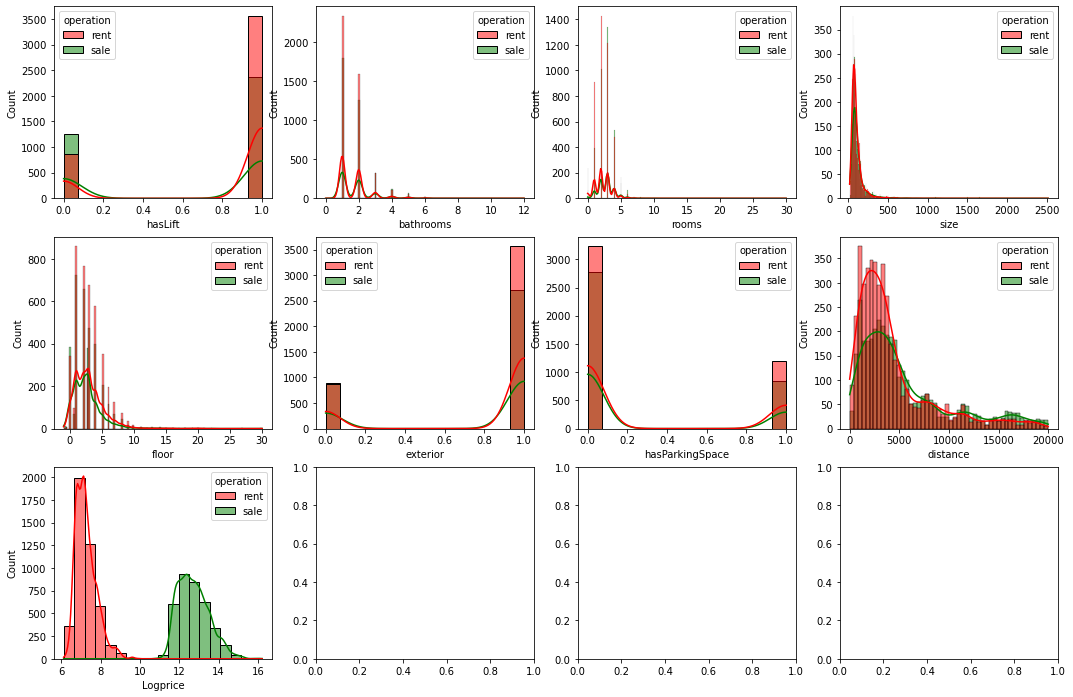

In [48]:
df_candidates = df[['operation','price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']].copy()
num_candidates = df_candidates.drop('operation',axis= 1).columns

df_candidates['Logprice'] = np.log(df.price.values)
colors = list('rg')
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

sns.histplot(data=df_candidates, x='hasLift', kde=True, palette=colors, hue='operation', ax=axs[0, 0])
sns.histplot(data=df_candidates, x='bathrooms', kde=True, palette=colors, hue='operation', ax=axs[0, 1])
sns.histplot(data=df_candidates, x='rooms', kde=True, palette=colors, hue='operation', ax=axs[0, 2])
sns.histplot(data=df_candidates, x='size', kde=True, palette=colors, hue='operation', ax=axs[0, 3])
sns.histplot(data=df_candidates, x='floor', kde=True, palette=colors, hue='operation', ax=axs[1, 0])
sns.histplot(data=df_candidates, x='exterior', kde=True, palette=colors, hue='operation', ax=axs[1, 1])
sns.histplot(data=df_candidates, x='hasParkingSpace', kde=True, palette=colors, hue='operation', ax=axs[1, 2])
sns.histplot(data=df_candidates, x='distance', kde=True, palette=colors, hue='operation', ax=axs[1, 3])
sns.histplot(data=df_candidates, x='Logprice', kde=True, palette=colors, hue='operation', ax=axs[2, 0])
plt.show()

In [49]:
# Descripcion estadistica de ventas y alquileres

df1=df[(df["operation"]=="sale")]
df2=df[(df["operation"]=="rent")]
dsales = pd.DataFrame(df1['price'].describe())
drent = pd.DataFrame(df2['price'].describe())
dsales.columns = ['Venta']
drent.columns = ['Alquiler']
description = dsales.join(drent)
print('Descripción de Price')
description

Descripción de Price


,Venta,Alquiler
count,3.611000e+03,4441.000000
mean,4.825601e+05,1672.194776
std,5.849280e+05,1342.877884
min,4.750000e+04,450.000000
25%,1.830000e+05,950.000000
50%,3.100000e+05,1295.000000
75%,5.600000e+05,1895.000000
max,1.100000e+07,20000.000000


In [50]:
# estadisticias  para sales
df_candidates = df[['operation','price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']].copy()
df_candidates[(df_candidates["operation"]=="sale")].describe()


,price,bathrooms,rooms,size,exterior,floor,hasParkingSpace,hasLift,distance
count,3.611000e+03,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000
mean,4.825601e+05,1.777901,2.812240,116.743174,0.752423,2.614899,0.232623,0.654943,5509.897812
std,5.849280e+05,1.093151,1.389783,122.656426,0.431664,2.234789,0.422562,0.475453,4703.000309
min,4.750000e+04,0.000000,0.000000,15.000000,0.000000,-1.000000,0.000000,0.000000,17.000000
25%,1.830000e+05,1.000000,2.000000,66.000000,1.000000,1.000000,0.000000,0.000000,2194.000000
50%,3.100000e+05,2.000000,3.000000,86.000000,1.000000,2.000000,0.000000,1.000000,3930.000000
75%,5.600000e+05,2.000000,3.000000,123.500000,1.000000,3.000000,0.000000,1.000000,7331.500000
max,1.100000e+07,12.000000,30.000000,2517.000000,1.000000,30.000000,1.000000,1.000000,19986.000000


In [51]:
# estadisticias  para rent
df_candidates = df[['operation','price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']].copy()
df_candidates[(df_candidates["operation"]=="rent")].describe()

,price,bathrooms,rooms,size,exterior,floor,hasParkingSpace,hasLift,distance
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,1672.194776,1.657510,2.327179,100.376717,0.804549,2.909435,0.270660,0.802972,4335.898221
std,1342.877884,0.913373,1.296705,77.352783,0.396593,2.292218,0.444351,0.397798,3970.416901
min,450.000000,0.000000,0.000000,15.000000,0.000000,-1.000000,0.000000,0.000000,12.000000
25%,950.000000,1.000000,1.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1745.000000
50%,1295.000000,1.000000,2.000000,80.000000,1.000000,2.700000,0.000000,1.000000,3084.000000
75%,1895.000000,2.000000,3.000000,115.000000,1.000000,4.000000,1.000000,1.000000,5024.000000
max,20000.000000,10.000000,21.000000,1250.000000,1.000000,27.000000,1.000000,1.000000,19964.000000


In [52]:
df.head()

,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,district,neighborhood,latitude,longitude,url,distance,description,status,hasLift,hasParkingSpace,subTypology
0,97064171,5.0,800.0,flat,rent,45.0,1.0,1,1,Calle de Carlos Arniches,Madrid,Madrid,Centro,Lavapiés-Embajadores,40.406651,-3.710015,https://www.idealista.com/inmueble/97064171/,1267,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,good,1.0,0.0,flat
1,97065270,1.0,3200.0,flat,rent,210.0,1.0,3,3,"Calle Cervantes, 22",Madrid,Madrid,Centro,Huertas-Cortes,40.414198,-3.697331,https://www.idealista.com/inmueble/97065270/,601,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,good,1.0,0.0,flat
2,97115209,2.0,1500.0,flat,rent,97.0,0.0,2,2,Calle de Fernández de la Hoz,Madrid,Madrid,Chamberí,Nuevos Ministerios-Ríos Rosas,40.438127,-3.693074,https://www.idealista.com/inmueble/97115209/,2518,Piso en emblemática finca en la calle Fernande...,good,1.0,1.0,flat
3,97104257,5.0,3100.0,duplex,rent,220.0,1.0,2,3,Calle de Valverde,Madrid,Madrid,Centro,Malasaña-Universidad,40.424661,-3.701559,https://www.idealista.com/inmueble/97104257/,876,Diplomatic Real Estate ofrece ático dúplex úni...,good,1.0,1.0,duplex
4,97115208,3.0,2100.0,flat,rent,169.0,1.0,3,2,Calle de Atocha,Madrid,Madrid,Centro,Huertas-Cortes,40.412576,-3.698022,https://www.idealista.com/inmueble/97115208/,667,MODUS HOME TE INVITA A VIVIR LA EXPERIENCIA DE...,good,1.0,0.0,flat


## Correlaciones

Se revisa las correlaciones

Text(0.5, 1.0, 'Matriz de Correlación')

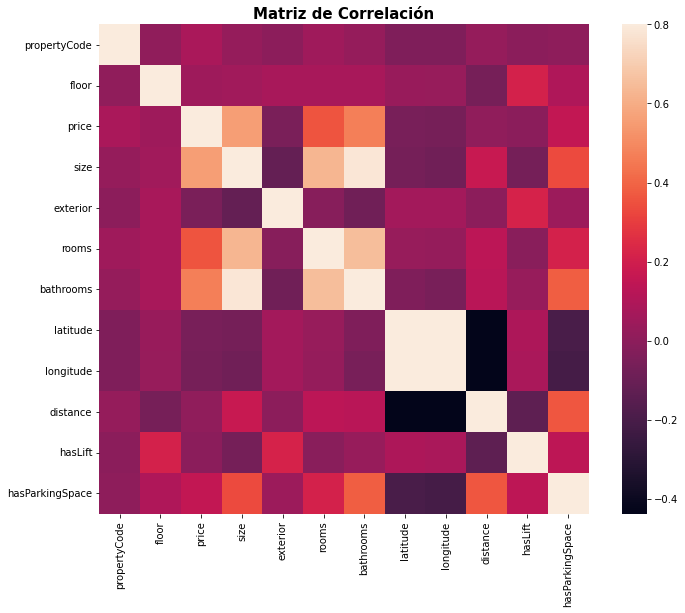

In [53]:
#correlation matrix
corrmat = df.corr()
#corrmat = df[df["province"] == "Madrid"].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True).set_title('Matriz de Correlación', fontsize=15, weight='bold')

### Correlaciones por tipo de operación:

Vemos la correlacion de las variables separando por tipo de operacion no hay variación,   correlación distribución:
* **alta(1-0.5):** size, bathrooms, rooms
* **media(0.25-0.05):** floor, hasParkinSpace, haslift
* **baja (<0.05):** distance,exterior


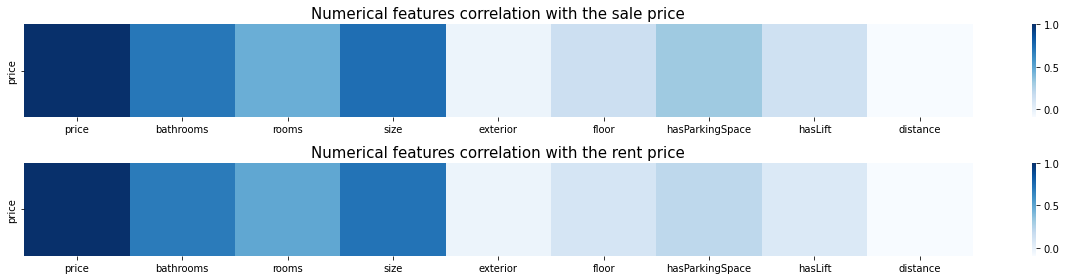

,Venta,Alquiler
price,1.000000,1.000000
size,0.735178,0.715629
bathrooms,0.700256,0.683928
rooms,0.453465,0.487669
hasParkingSpace,0.315220,0.208995
floor,0.146531,0.095148
hasLift,0.130300,0.064509
exterior,-0.035097,-0.033167
distance,-0.095053,-0.093467


In [54]:
#Vemos la correlacion para cada operación: 

feat_list = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
df1=df[df["operation"]=="sale"][feat_list].select_dtypes(exclude='object').corr()
df2=df[df["operation"]=="rent"][feat_list].select_dtypes(exclude='object').corr()

fig, axs= plt.subplots(2, 1, figsize=(17,4))
sns.heatmap(df1.sort_values(by=['price'], ascending=False).head(1), cmap='Blues', ax=axs[0]).set_title('Numerical features correlation with the sale price', fontsize=15)
sns.heatmap(df2.sort_values(by=['price'], ascending=False).head(1), cmap='Blues', ax=axs[1]).set_title('Numerical features correlation with the rent price', fontsize=15)
fig.tight_layout()


plt.show()

cm = sns.light_palette("Cyan", as_cmap=True)

b = pd.DataFrame(df1['price'].sort_values(ascending=False).head(10).to_frame())
b2 = pd.DataFrame(df2['price'].sort_values(ascending=False).head(10).to_frame())
b.columns = ['Venta']
b2.columns = ['Alquiler']
description = b.join(b2)
description.style.background_gradient(cmap=cm)

### Correlaciones por Ciudad:

Vemos la correlacion de las variables separando por tipo provincia no hay variación pero baja mas en especial para barcelona,   correlación distribución:
* **alta(1-0.5):** size, bathrooms, rooms
* **media(0.25-0.05):** floor, hasParkinSpace
* **baja (<0.05):** distance,exterior, haslift


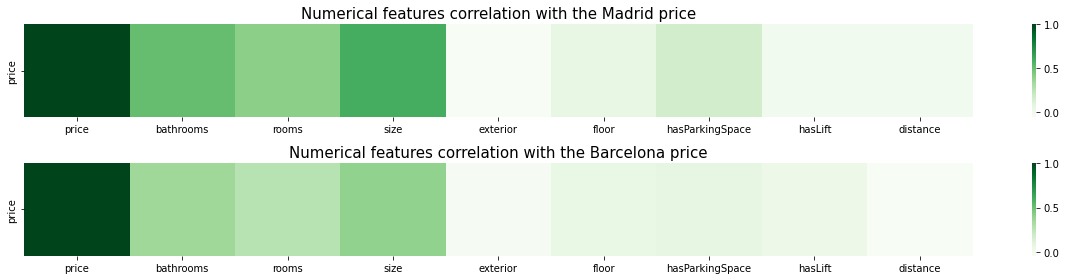

,Madrid,Barcelona
price,1.000000,1.000000
size,0.592306,0.393651
bathrooms,0.503757,0.356657
rooms,0.400925,0.274778
hasParkingSpace,0.161908,0.077665
floor,0.049581,0.058279
hasLift,-0.014860,0.034286
distance,-0.017330,-0.039408
exterior,-0.059953,-0.024774


In [55]:
#Vemos la correlacion para cada operación: 

feat_list = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
df1=df[df["province"]=="Madrid"][feat_list].select_dtypes(exclude='object').corr()
df2=df[df["province"]=="Barcelona"][feat_list].select_dtypes(exclude='object').corr()

fig, axs= plt.subplots(2, 1, figsize=(17,4))
sns.heatmap(df1.sort_values(by=['price'], ascending=False).head(1), cmap='Greens', ax=axs[0]).set_title('Numerical features correlation with the Madrid price', fontsize=15)
sns.heatmap(df2.sort_values(by=['price'], ascending=False).head(1), cmap='Greens', ax=axs[1]).set_title('Numerical features correlation with the Barcelona price', fontsize=15)
fig.tight_layout()


plt.show()


cm = sns.light_palette("Lightgreen", as_cmap=True)

b = pd.DataFrame(df1['price'].sort_values(ascending=False).head(10).to_frame())
b2 = pd.DataFrame(df2['price'].sort_values(ascending=False).head(10).to_frame())
b.columns = ['Madrid']
b2.columns = ['Barcelona']
description = b.join(b2)
description.style.background_gradient(cmap=cm)

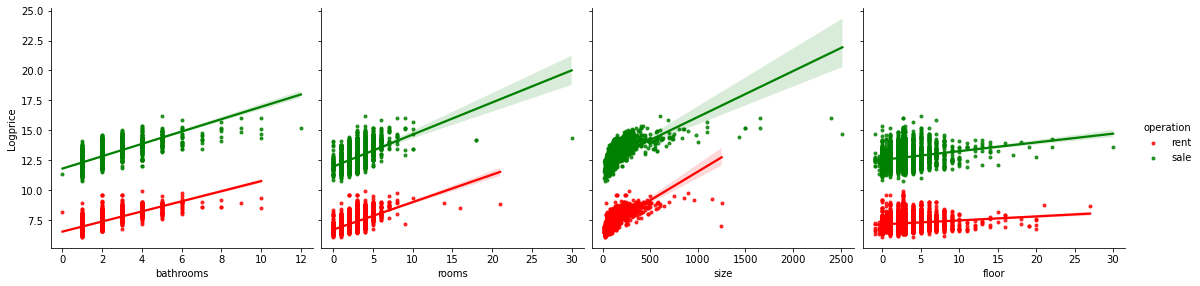

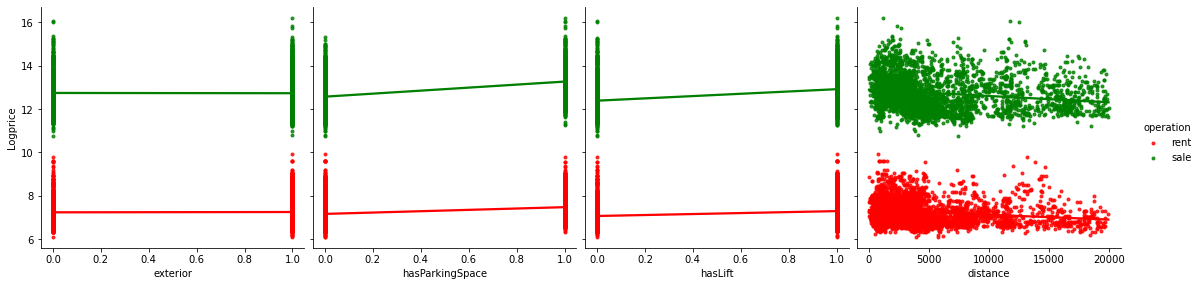

In [56]:
#revisamos las features prinpipales contra logprice
df_candidates = df[['operation','price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']].copy()
num_candidates = df_candidates.drop('operation',axis= 1).columns

df_candidates['Logprice'] = np.log(df.price.values)

#colors=('red', 'blue')
colors = list('rgbkymc')
mark = ['.','.'] 
sns.pairplot(df_candidates,x_vars=['bathrooms','rooms','size', 'floor'],y_vars=['Logprice'], kind='reg',hue='operation', height=4, palette=colors, markers = mark)
sns.pairplot(df_candidates,x_vars=['exterior', 'hasParkingSpace', 'hasLift', 'distance'],y_vars=['Logprice'],kind='reg',hue='operation', height=4, palette=colors, markers = mark)

### Revición de anomalias (Outliers)

En los boxplots y por el calculo de la distancia inter-cuartil, se puede observar como anormalidades para ambas operaciones:

* prince > 3300 (Alquiler), 1125000 (Ventas)
* size > 210
* bathrooms > 4
* room > 6
* floors > 9

No obstante se excluiran outliers usando algoritmo IsolationForest en la proxima sessión

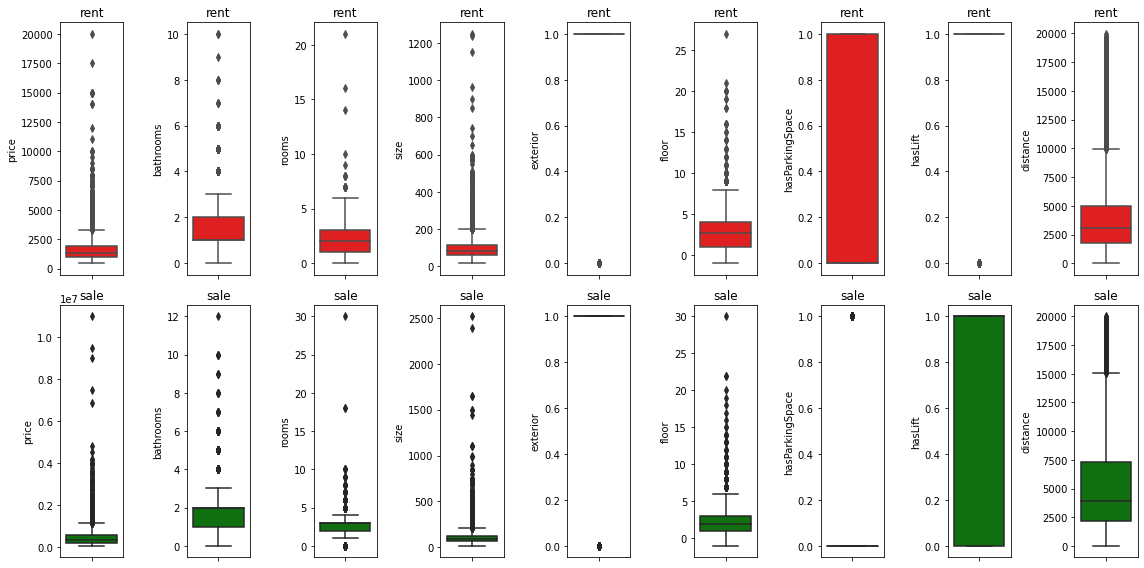

In [57]:
feat = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
op = df["operation"].unique()
c = list('rg')

fig, axe =plt.subplots(len(op),len(feat),figsize=(16, 8))
for o in range(len(op)):
    for f in range(len(feat)):
        sns.boxplot(y=feat[f], data=df[(df["operation"]==op[o])], color=c[o],ax=axe[o,f]).set(title=op[o])
        fig.tight_layout()
plt.show()



In [82]:
feat = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
op = df["operation"].unique()

def outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    oulier_hi=Q3+1.5*IQR
    oulier_low=Q1-1.5*IQR
    return oulier_hi,oulier_low


oulierdf = pd.DataFrame(index=feat)
for o in range(len(op)):
    
    #print(op[o])
    data=df[(df["operation"]==op[o])]
    l=[]
    c=[]
    for f in range(len(feat)):
        hi,low = outlier_IQR(data[feat[f]])
        counts = data[data[feat[f]]>hi][feat[f]].count()
        #print(counts)
        l.append(hi)
        c.append(counts)
        #print(feat[f],':',hi)
    outliers = pd.DataFrame(l,index=feat)
    outliers.columns = ['thd_'+op[o]]
    oulierdf = oulierdf.join(outliers)
    cliers = pd.DataFrame(c,index=feat)
    cliers.columns = ['count_'+op[o]]
    oulierdf = oulierdf.join(cliers)

print('Anomalias por el whisker superior')
oulierdf

Anomalias por el whisker superior


,thd_rent,count_rent,thd_sale,count_sale
price,3312.5,303,1125500.00,290
bathrooms,3.5,188,3.50,233
rooms,6.0,23,4.50,276
size,197.5,324,209.75,332
exterior,1.0,0,1.00,0
floor,8.5,88,6.00,178
hasParkingSpace,2.5,0,0.00,840
hasLift,1.0,0,2.50,0
distance,9942.5,444,15037.75,282


In [87]:
feat = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
op = df["operation"].unique()

def outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    oulier_hi=Q3+3*IQR
    oulier_low=Q1-3*IQR
    return oulier_hi,oulier_low


oulierdf = pd.DataFrame(index=feat)
for o in range(len(op)):
    
    #print(op[o])
    data=df[(df["operation"]==op[o])]
    l=[]
    c=[]
    for f in range(len(feat)):
        hi,low = outlier_IQR(data[feat[f]])
        counts = data[data[feat[f]]>hi][feat[f]].count()
        #print(counts)
        l.append(hi)
        c.append(counts)
        #print(feat[f],':',hi)
    outliers = pd.DataFrame(l,index=feat)
    outliers.columns = ['thd_'+op[o]]
    oulierdf = oulierdf.join(outliers)
    cliers = pd.DataFrame(c,index=feat)
    cliers.columns = ['count_'+op[o]]
    oulierdf = oulierdf.join(cliers)

print('Anomalias por el whisker superior extreme')
oulierdf

Anomalias por el whisker superior extreme


,thd_rent,count_rent,thd_sale,count_sale
price,4730.0,142,1691000.0,114
bathrooms,5.0,27,5.0,44
rooms,9.0,4,6.0,39
size,280.0,122,296.0,167
exterior,1.0,0,1.0,0
floor,13.0,20,9.0,46
hasParkingSpace,4.0,0,0.0,840
hasLift,1.0,0,4.0,0
distance,14861.0,179,22744.0,0


In [89]:
#Quitamos Outlier, para viviendas en venta y alquiler:

cleaned_df = df[((df['operation']=="rent") & (df['price']<4730)) | (df['operation']=="sale")]
cleaned_df = cleaned_df[((cleaned_df['operation']=="sale") & (cleaned_df['price']<1691000)) | (cleaned_df['operation']=="rent")]

#Quitamos Outlier en el tamaño, en este caso pisos mayores a 296m2
cleaned_df = cleaned_df[cleaned_df['size'] < 296]
#Quitamos Outliers, que vemos que son pisos con más de 9 cuartos
cleaned_df = cleaned_df[cleaned_df['rooms'] <= 9]
#Quitamos Outliers, que vemos que son pisos con más de 5 baños
cleaned_df = cleaned_df[cleaned_df['bathrooms'] <= 5]
#Quitamos Outliers, que vemos que son pisos con más de 13 pisos
cleaned_df = cleaned_df[cleaned_df['floor'] <= 13]

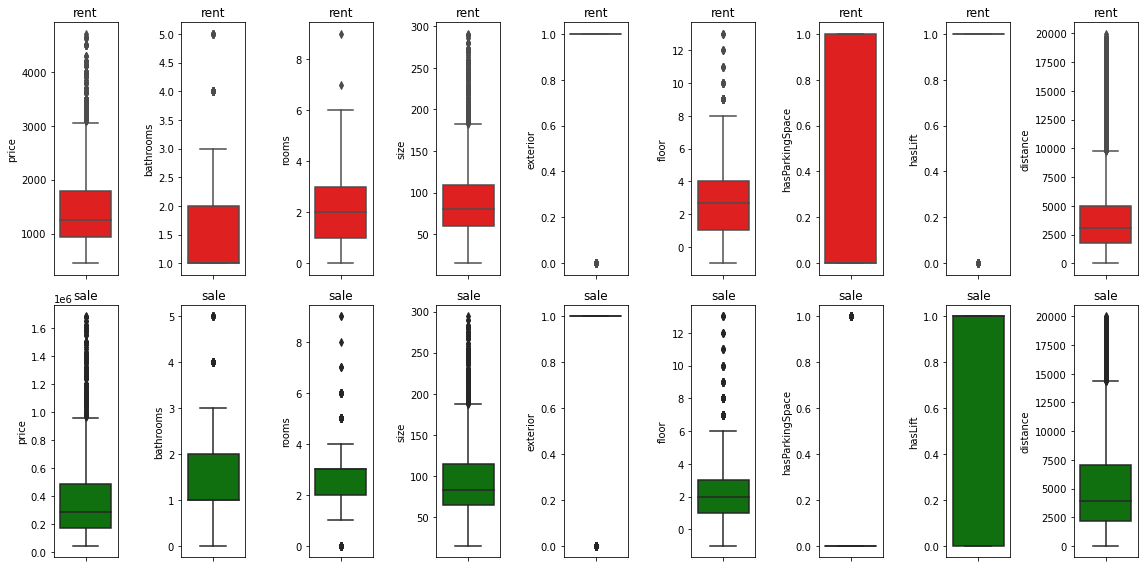

In [90]:
feat = ['price', 'bathrooms', 'rooms', 'size', 'exterior', 'floor', 'hasParkingSpace', 'hasLift', 'distance']
op = cleaned_df["operation"].unique()
c = list('rg')

fig, axe =plt.subplots(len(op),len(feat),figsize=(16, 8))
for o in range(len(op)):
    for f in range(len(feat)):
        sns.boxplot(y=feat[f], data=cleaned_df[(cleaned_df["operation"]==op[o])], color=c[o],ax=axe[o,f]).set(title=op[o])
        fig.tight_layout()
plt.show()

In [91]:
print("con outliers", df.shape)
print("sin outliers", cleaned_df.shape)

con outliers (8052, 23)
sin outliers (7620, 23)


Relacion de price contra las variables categoricas

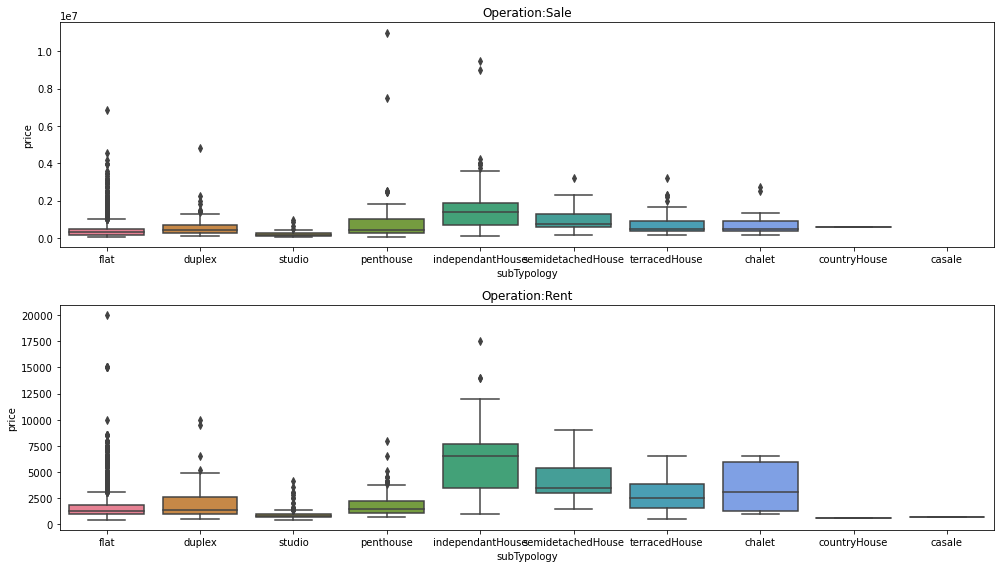

In [93]:
dist=list(df['subTypology'].unique())
colors = dict(zip(dist, sns.color_palette("husl",len(dist))))


fig, axe = plt.subplots(2,1,figsize=(14, 8))

sns.boxplot(x='subTypology', y='price', data=df[(df["operation"]=="sale")],ax=axe[0], palette=colors, order=dist).set(title='Operation:Sale')
sns.boxplot(x='subTypology', y='price', data=df[(df["operation"]=="rent")],ax=axe[1], palette=colors, order=dist).set(title='Operation:Rent')
fig.tight_layout()
plt.show()
#fig.axis(ymin=0, ymax=800000);

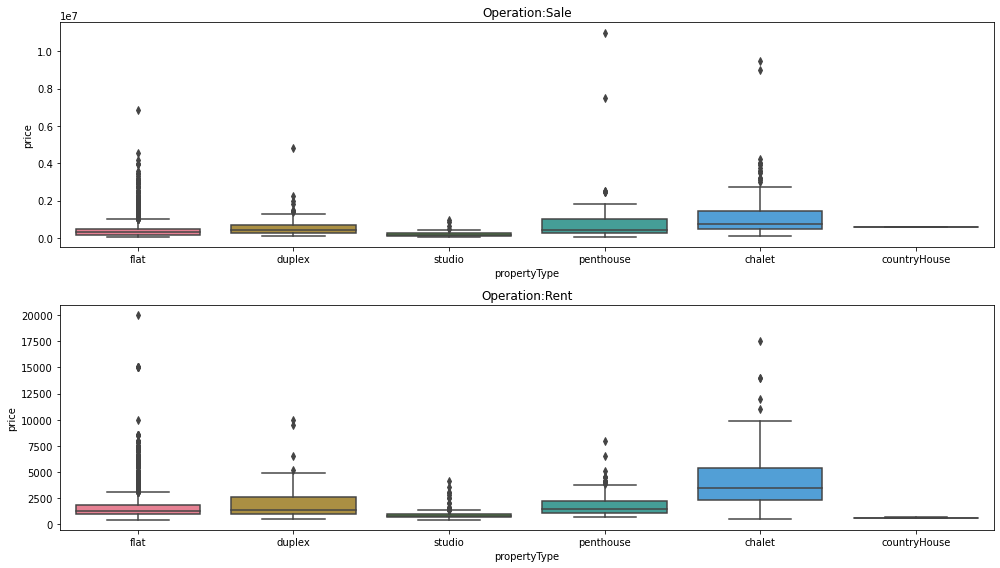

In [94]:
dist=list(df['propertyType'].unique())
colors = dict(zip(dist, sns.color_palette("husl",len(dist))))


fig, axe = plt.subplots(2,1,figsize=(14, 8))

g=sns.boxplot(x='propertyType', y='price', data=df[(df["operation"]=="sale")],ax=axe[0], palette=colors, order=dist).set(title='Operation:Sale')

sns.boxplot(x='propertyType', y='price', data=df[(df["operation"]=="rent")],ax=axe[1], palette=colors, order=dist).set(title='Operation:Rent')
fig.tight_layout()

plt.show()

#plt.xticks(rotation=90)
#fig.axis(ymin=0, ymax=800000);

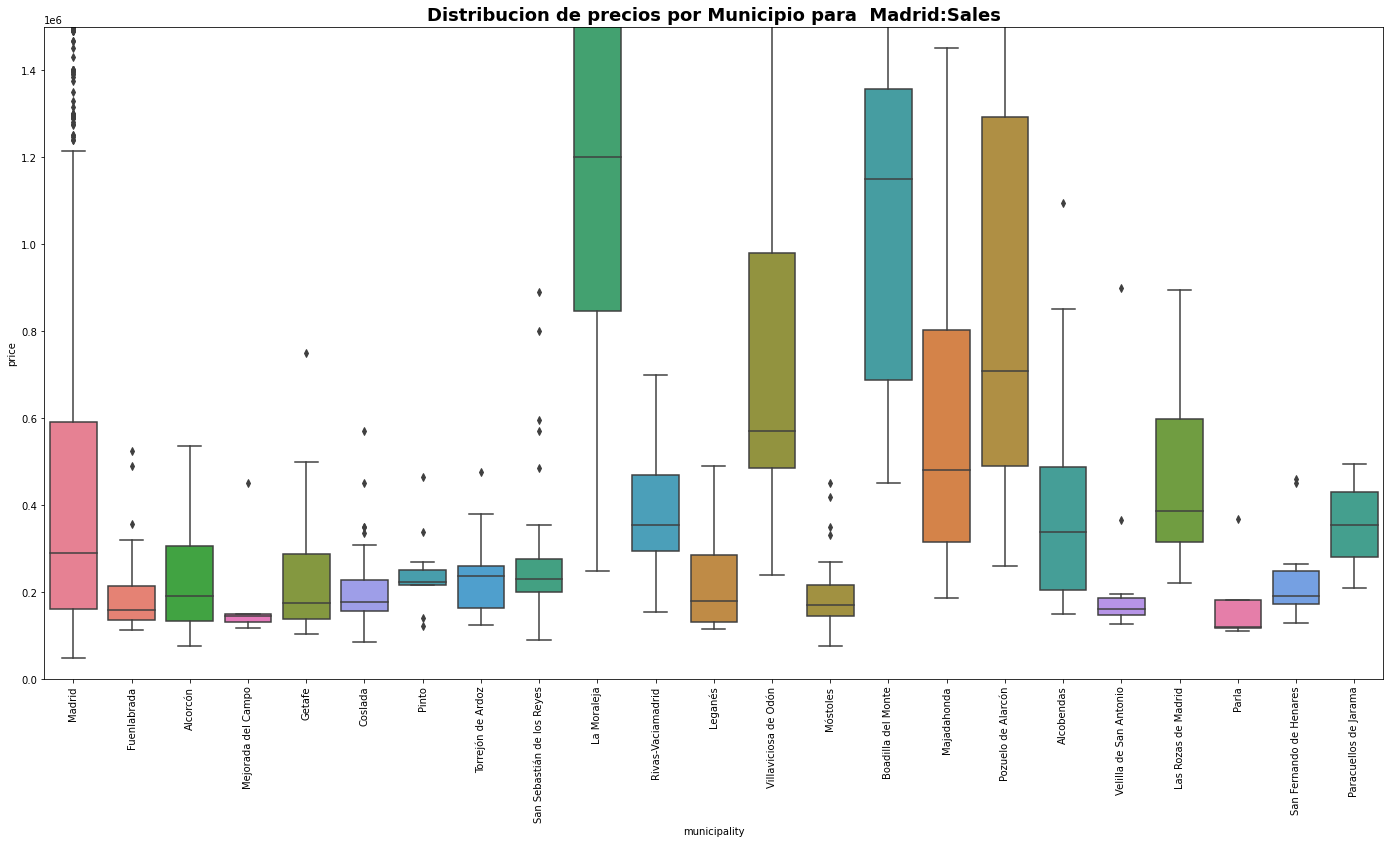

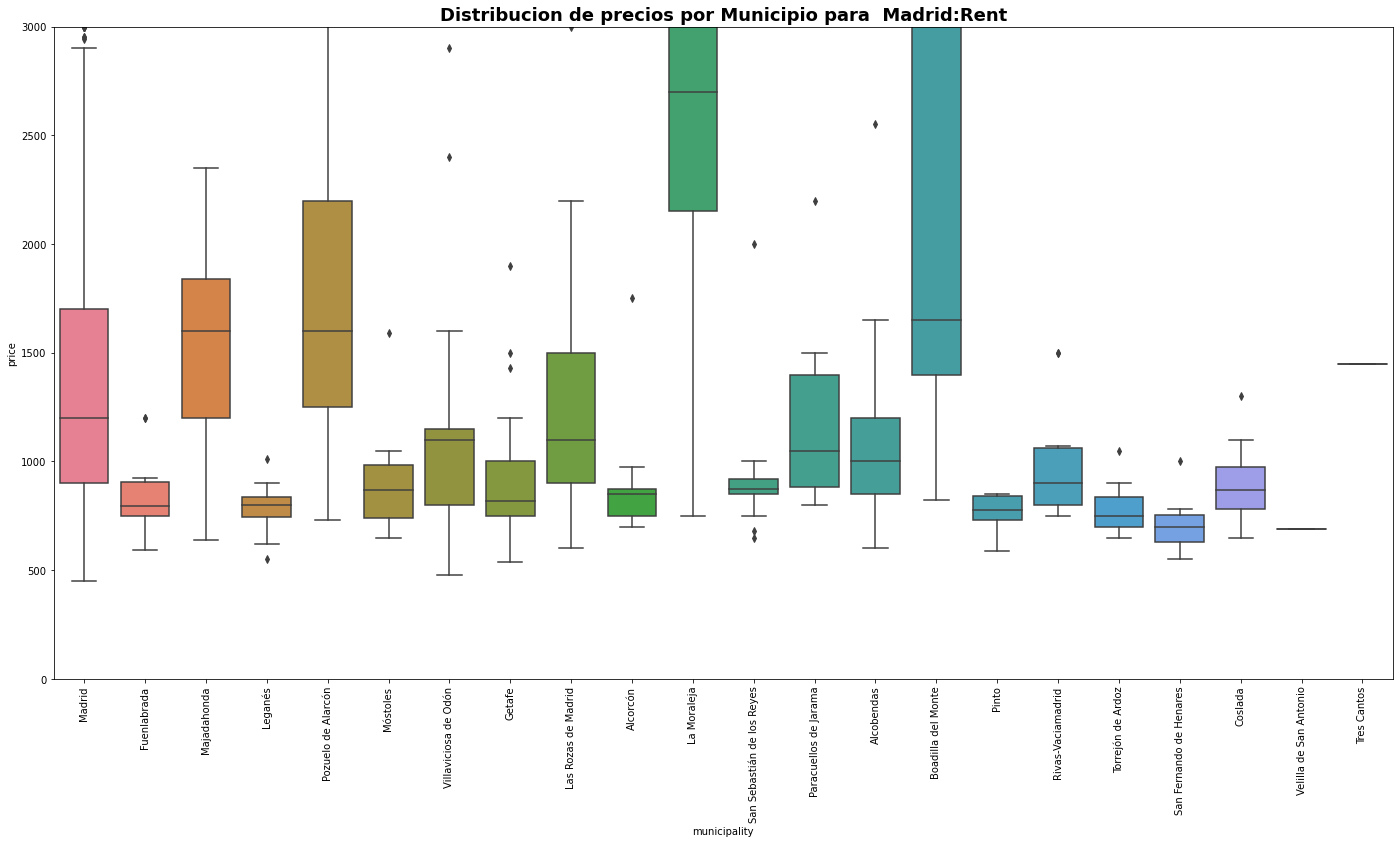

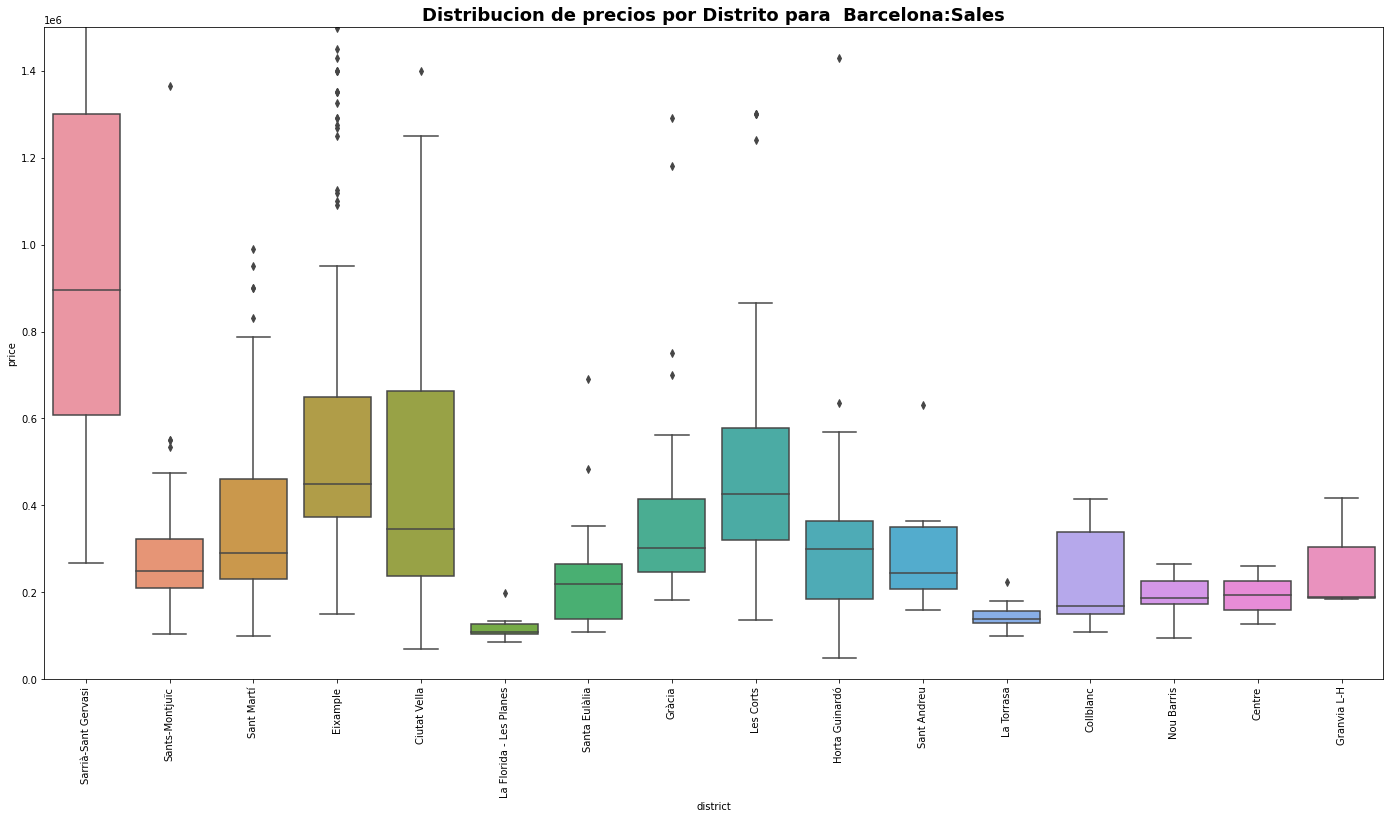

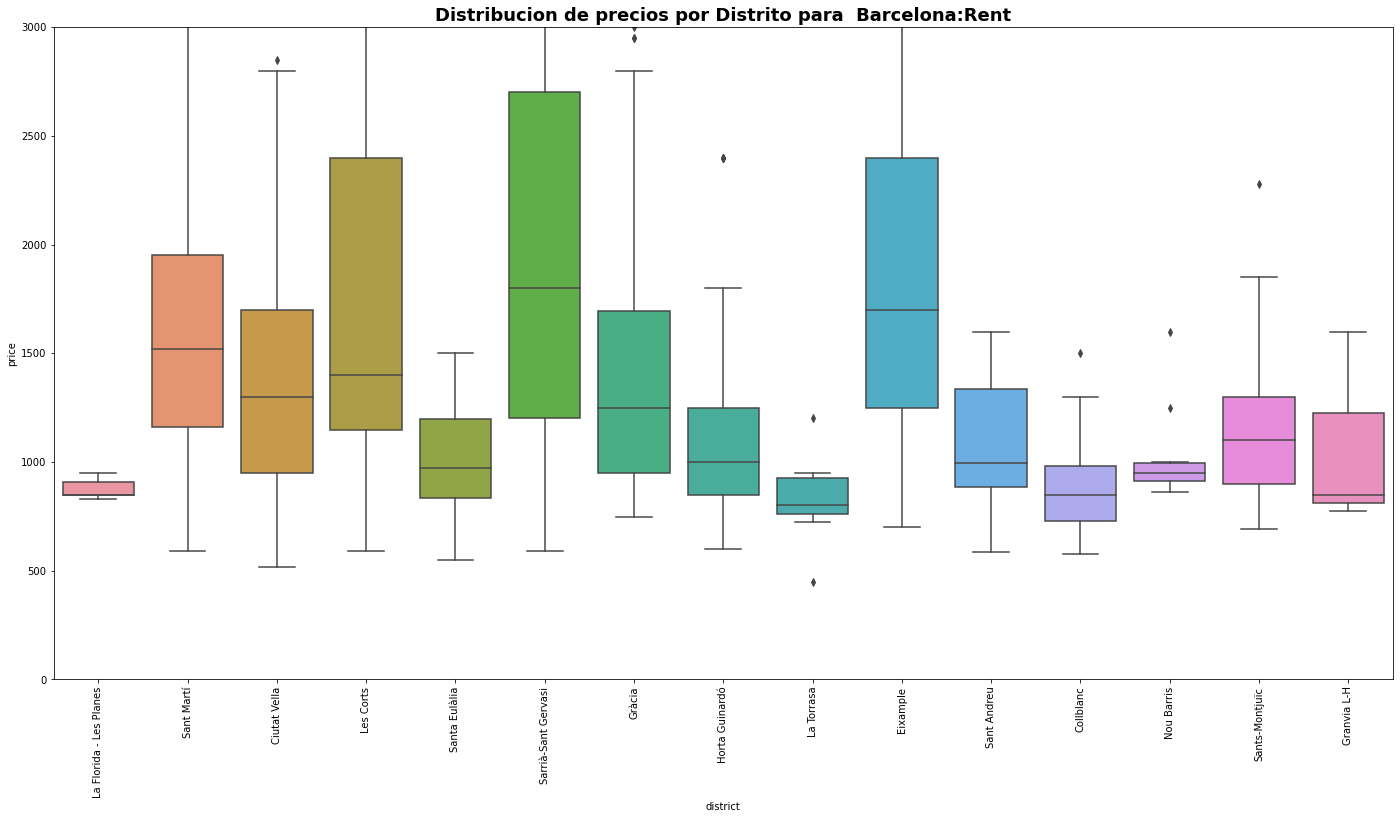

In [95]:
dist=list(df['municipality'].unique())
colors = dict(zip(dist, sns.color_palette("husl",len(dist))))


f, ax = plt.subplots(figsize=(24, 12))
fig = sns.boxplot(x='municipality', y="price", data=df[(df["operation"]=='sale') & (df["province"]=='Madrid')], palette=colors)
fig.axis(ymin=0, ymax=1500000)
plt.xticks(rotation=90)
plt.title("Distribucion de precios por Municipio para  Madrid:Sales", weight='bold', fontsize=18);

f, ax = plt.subplots(figsize=(24, 12))
fig = sns.boxplot(x='municipality', y="price", data=df[(df["operation"]=='rent') & (df["province"]=='Madrid')], palette=colors)
fig.axis(ymin=0, ymax=3000)
plt.xticks(rotation=90)
plt.title("Distribucion de precios por Municipio para  Madrid:Rent", weight='bold', fontsize=18);

f, ax = plt.subplots(figsize=(24, 12))
fig = sns.boxplot(x='district', y="price", data=df[(df["operation"]=='sale') & (df["province"]=='Barcelona')])
fig.axis(ymin=0, ymax=1500000)
plt.xticks(rotation=90)
plt.title("Distribucion de precios por Distrito para  Barcelona:Sales", weight='bold', fontsize=18);

f, ax = plt.subplots(figsize=(24, 12))
fig = sns.boxplot(x='district', y="price", data=df[(df["operation"]=='rent') & (df["province"]=='Barcelona')])
fig.axis(ymin=0, ymax=3000)
plt.xticks(rotation=90)
plt.title("Distribucion de precios por Distrito para  Barcelona:Rent", weight='bold', fontsize=18);


In [106]:
#separamos el dataset por los dos tipos de operación

df_rent = cleaned_df[cleaned_df['operation']== 'rent']
df_sale = cleaned_df[cleaned_df['operation']== 'sale']

df_rent.info()
df_sale.info()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 0 to 4440
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   propertyCode     4236 non-null   int64  
 1   floor            4236 non-null   float64
 2   price            4236 non-null   float64
 3   propertyType     4236 non-null   object 
 4   operation        4236 non-null   object 
 5   size             4236 non-null   float64
 6   exterior         4236 non-null   float64
 7   rooms            4236 non-null   int64  
 8   bathrooms        4236 non-null   int64  
 9   address          4236 non-null   object 
 10  province         4236 non-null   object 
 11  municipality     4236 non-null   object 
 12  district         4236 non-null   object 
 13  neighborhood     4236 non-null   object 
 14  latitude         4236 non-null   float64
 15  longitude        4236 non-null   float64
 16  url              4236 non-null   object 
 17  distance      

In [109]:
#Guaardamos dataframe
import datetime

fileresult = 'all_cleaned' + '_' + datetime.datetime.today().strftime('%Y-%m-%d-%H-%M') + '.csv'
filerent = 'rent_cleaned' + '_' + datetime.datetime.today().strftime('%Y-%m-%d-%H-%M') + '.csv'
filesale = 'sale_cleaned' + '_' + datetime.datetime.today().strftime('%Y-%m-%d-%H-%M') + '.csv'
cleaned_df.to_csv(fileresult)
df_rent.to_csv(filerent)
df_sale.to_csv(filesale)

In [110]:
import os
os.getcwd()

'C:\\Users\\luis\\Desktop\\Master\\Materias\\MBIG20-12 TFM\\Notebooks'

In [111]:
os.listdir()

['.ipynb_checkpoints',
 'all_cleaned_2022-04-17-14-52.csv',
 'checkpoint.csv',
 'data',
 'Idealista_search-test_insomia.csv',
 'Idealista_search-test_insomiaReviewed.csv',
 'images',
 'rent_cleaned_2022-04-17-14-52.csv',
 'sale_cleaned_2022-04-17-14-52.csv',
 'temporal test.ipynb',
 'TFM-RealSate-Api_Idealista_extractor_Final.ipynb',
 'TFM-RealState-Api_Idealista_extractor_v0.ipynb',
 'TFM-RealState-DataEngineering.ipynb',
 'TFM-RealState-DataEngineeringV0.ipynb',
 'TFM-RealState-DataEngineeringV1.ipynb',
 'TFM-RealState-PackageInstallation.ipynb',
 'viu.png']